### Downloading the Data

In [91]:
# Importing the required libraries
import os
import tarfile
import urllib.request

In [92]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [93]:
# Function to create a directory for the dataset and download and extract
def fetchHousingData(housingURL=HOUSING_URL, housingPath=HOUSING_PATH):
    os.makedirs(housingPath, exist_ok=True) # exist_ok=True means is already
                                            # exists then file remains unaltered
                                            # if False then OSError raised
    tgzPath = os.path.join(housingPath, "housing.tgz")
    urllib.request.urlretrieve(housingURL, tgzPath)
    housing_tgz = tarfile.open(tgzPath)
    housing_tgz.extractall(path=housingPath)
    housing_tgz.close()
# end function fetchHosuingData()

In [94]:
# Fetching and downloading the data by calling the above defined function
fetchHousingData()

In [95]:
# Loading the data using pandas
import pandas as pd

In [96]:
# Function to load data and return a pandas DataFrame object
def loadHousingData(housingPath=HOUSING_PATH):
    csvPath = os.path.join(HOUSING_PATH, "housing.csv")

    return pd.read_csv(csvPath)
# end function loadHosuingData()

### Quick Look at the Data Structure

In [97]:
housingDF = loadHousingData() # function call
housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
# Seeing the overall description of the table/data
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [99]:
# Determining the categories in ocean_proximity coloumn and counting the number
# of districts in each
housingDF["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [100]:
# Summary of the numerical attributes
housingDF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Have a visualisation of the data structure using histograms

In [101]:
# Set-up to plot pretty figures
# only for Jupyter Notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14, titlecolor="w")
mpl.rc("xtick", labelsize=12, c="w")
mpl.rc("ytick", labelsize=12, c="w")

In [102]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function to save the figures
def saveFigures(figID, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, figID + "." + fig_extension)
    print("Saving the figure...", figID)

    if tight_layout:
        plt.tight_layout()

    plt.savefig(path, format=fig_extension, dpi=resolution)
# end function saveFigures()

Saving the figure... all_attributes_histograms


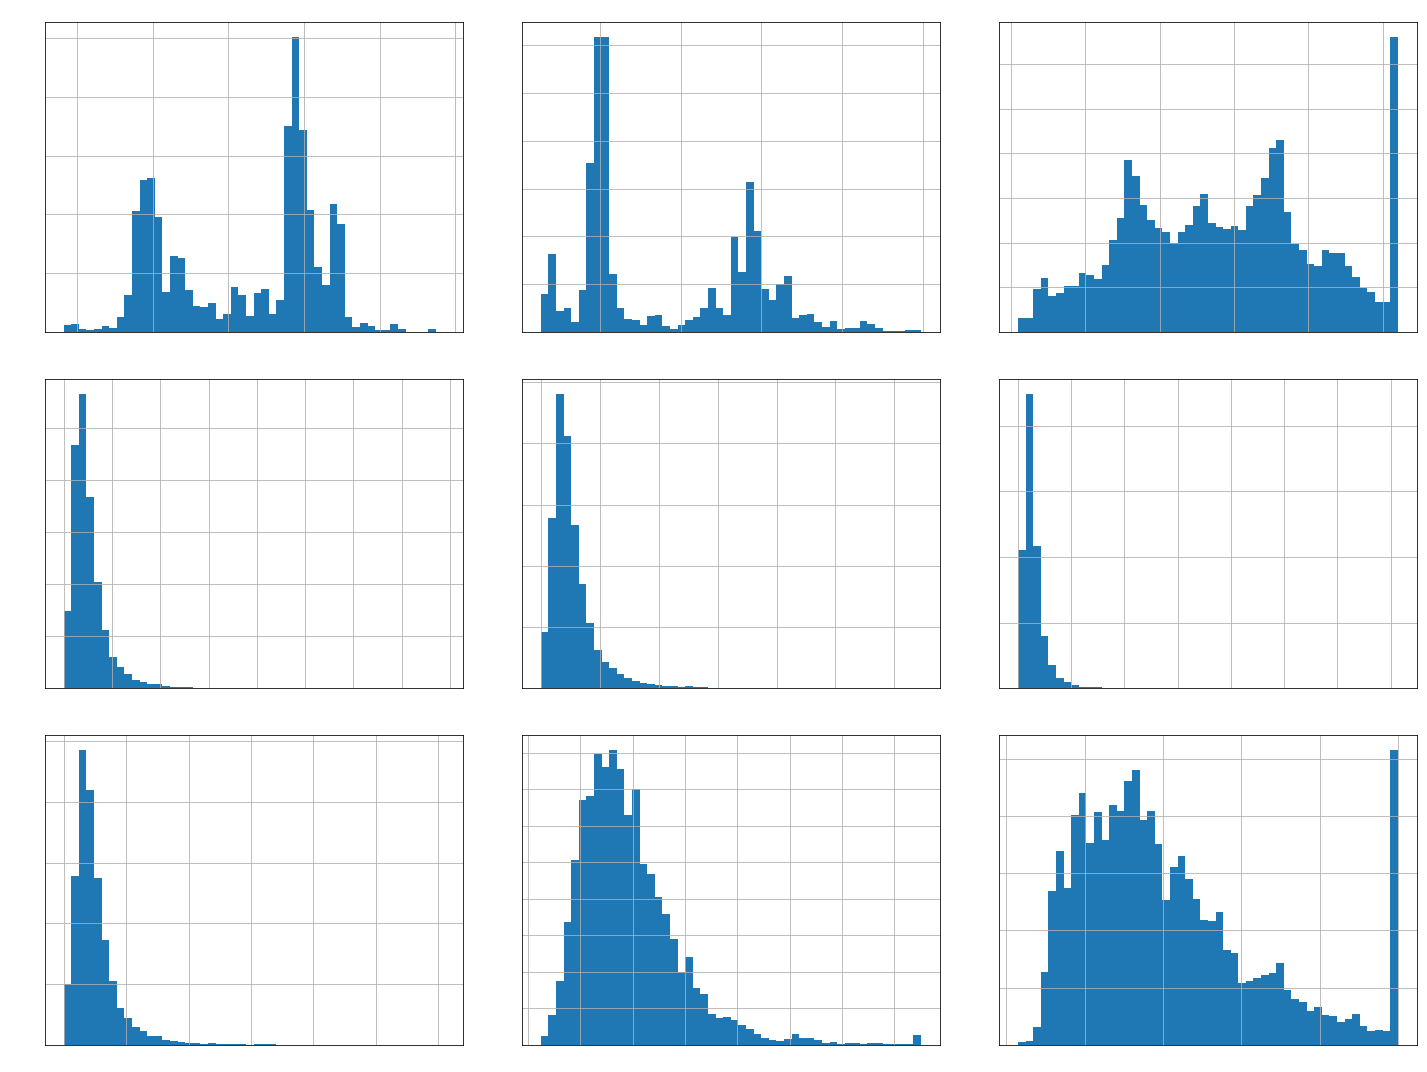

In [103]:
# Visualising the data with histograms
housingDF.hist(bins=50, figsize=(20, 15))
# Saving the figures
saveFigures("all_attributes_histograms")
plt.show()

### Create a Test Set

In [104]:
# For illustrations only as Sklearn has a function that splits the data into
# training and test sets.
import numpy as np

# Function to split the data into train and test sets
def splitTrainTest(dataFrame, testRatio):
    np.random.seed(42) # to make the output identical in every run
    shuffledIndices = np.random.permutation(len(dataFrame))
    testSetSize = int(len(dataFrame) * testRatio)
    testIndices = shuffledIndices[: testSetSize]
    trainIndices = shuffledIndices[testSetSize: ]

    return dataFrame.iloc[trainIndices], dataFrame.iloc[testIndices]
# end function splitTrainTest()

In [105]:
trainSet, testSet = splitTrainTest(housingDF, 0.2)
print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

The train set length = 16512
The test set length = 4128


In [106]:
testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [107]:
# For illustrations: using hash method
from zlib import crc32

# Function to make sure the test set contains instances with hashes less than
# 20% of the maximum hash
def testSetCheck(identifier, testRatio):
    return crc32(np.int64(identifier)) & 0xffffffff < (testRatio * 2**32)
# end function testSetCheck()

# Function to split the dataset
def splitTrainTest_byID(dataFrame, testRatio, id_coloumn):
    ids = dataFrame[id_coloumn]
    inTestSet = ids.apply(lambda id_: testSetCheck(id_, testRatio))

    return dataFrame.loc[~inTestSet], dataFrame.loc[inTestSet]
# end function splitTrainTest_byID()

In [108]:
# As the housing dataset does not have a identifier, we use the row index
housingWithID = housingDF.reset_index() # adds an 'index' column
trainSet, testSet = splitTrainTest_byID(housingWithID, 0.2, "index")

print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

The train set length = 16512
The test set length = 4128


In [109]:
testSet.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [110]:
# If using the row index as the identifier is not possible, then build
# an identifier using two or more attributes
# For housing dataset, latitudes and longitudes are stable for millions of years
# So can use them to create an identifier
housingWithID["id"] = housingDF["longitude"] * 1000 + housingDF["latitude"]

trainSet, testSet = splitTrainTest_byID(housingWithID, 0.2, "id")
print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

testSet.head()

The train set length = 16322
The test set length = 4318


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


We can see that the set length is unidentical to the previous formed sets.
This is because many districts have the exact same ID, so they ended up
in the same set (train or test). This introduced some unfortunate sampling bias.

In [111]:
# Using the function from Sklearn package to split the dataset
from sklearn.model_selection import train_test_split

# random_state parameter is the random seed to keep the output same
trainSet, testSet = train_test_split(housingDF, test_size=0.2, random_state=42)

print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

The train set length = 16512
The test set length = 4128


In [112]:
testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


We see that train_test_split() method from sklearn has the same working as the
user-defined function splitTrainTest(); only with additional features

Saving the figure... median_income


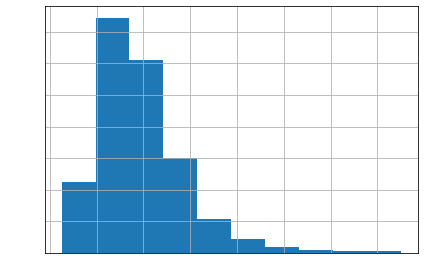

In [114]:
# SUPPOSE median income is an important attribute in determining the median
# house prices. So let's look at its histogram more closely.
housingDF["median_income"].hist()
saveFigures("median_income")
plt.show()

The values are clustered around 1.5 to 6. But some go well beyond 6.
So need to create an income category attribute - will make the data
representative of the various income categories.

In [115]:
# Category 1 is from 0 to 1.5, Category 2 ranges from 1.5 to 3, and so on...
housingDF["income_category"] = pd.cut(housingDF["median_income"],
                                      bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                      labels=[1, 2, 3, 4, 5])

In [118]:
housingDF["income_category"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

Saving the figure... income_category


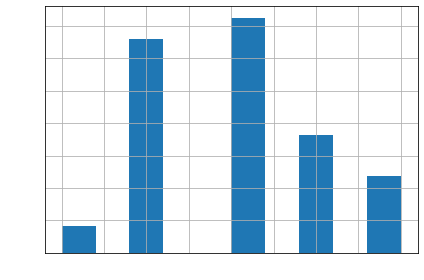

In [116]:
housingDF["income_category"].hist()
saveFigures("income_category")
plt.show()

In [117]:
# Doing stratified sampling based on the income category.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_i, test_i in split.split(housingDF, housingDF["income_category"]):
    stratTrainSet = housingDF.loc[train_i]
    stratTestSet = housingDF.loc[test_i]
# end for

In [119]:
# Checking if it worked properly
stratTestSet["income_category"].value_counts() / len(stratTestSet)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [120]:
# Function to see the proportions of the data
def incomeCategoryProportions(dataFrame):
    return dataFrame["income_category"].value_counts() / len(dataFrame)
# end function incomeCategoryProportions()

trainSet_2, testSet_2 = train_test_split(housingDF, test_size=0.2,
                                         random_state=42)

compareProportions = pd.DataFrame({
    "Overall": incomeCategoryProportions(housingDF),
    "Stratified": incomeCategoryProportions(stratTestSet),
    "Random": incomeCategoryProportions(testSet_2),
}).sort_index()

pE1 = 100 * compareProportions["Random"] / compareProportions["Overall"] - 100
pE2 = 100 * compareProportions["Stratified"] / compareProportions["Overall"] - 100
compareProportions["Rand. %error"] = pE1
compareProportions["Strat. %error"] = pE2

In [121]:
# Creating the figure
compareProportions

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [122]:
# Now deleting the income_category column and getting the original dataframe
for set_ in (stratTrainSet, stratTestSet):
    set_.drop("income_category", axis=1, inplace=True)
# end for

In [126]:
stratTestSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB
